# Contestants' results 
- This notebook shows how to use this package, and more specifically part 2 (Contestant approaches for Community Detection)
- Please check other notebooks for other parts (data generation and multi-criteria approach)

## Contestants results
- Generating data (graphs) following a set of parameters
- Running contestants on those graphs and aggregating results
- Plotting results

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import igraph
import pandas as pd
from moo.data_generation import ExpConfig, DataGenerator
from moo.contestant import get_best_community_solutions, draw_best_community_solutions
import moo.contestant as contestant
import matplotlib.pyplot as plt

In [2]:
# Define an experiment configuration instance (parameters for data generation)
# Fig. 5 (see paper)
expconfig = ExpConfig(
    L=[15,15], U=[15,15], NumEdges=200, BC=0.1, NumGraphs=30,
    shuffle=True, seed=42
)
print(expconfig) # Print parameters, or access individually, e.g., expconfig.NumEdges

# Generate data following the defined experiment confguration
expgen = DataGenerator(expconfig=expconfig) # Pass defined parameters
print(expgen)
datagen = expgen.generate_data() # datagen is an iterator

<ExpConfig: filename=, L=[15, 15], U=[15, 15], NumNodes=60, NumEdges=200, BC=0.1, NumGraphs=30, shuffle=True, seed=42>
<DataGenerator: ExpConfig: filename=, L=[15, 15], U=[15, 15], NumNodes=60, NumEdges=200, BC=0.1, NumGraphs=30, shuffle=True, seed=42>


In [3]:
# Define the contestant approaches to run on the data
# Many of those contestants are defined as subclasses of CommunityDetector class
# Please refer to contestant.py for example about how to define your own custom approach
# and use it in the following benchmarks
# In the following no parameters (default) are passed, please refer to the class init 
# for default parameter values or pass your own.

algos = [
    contestant.ComDetMultiLevel(), # Multi-Level approach
    contestant.ComDetEdgeBetweenness(), # EdgeBetweenness approach
    contestant.ComDetWalkTrap(), # WalkTrap approach
    contestant.ComDetFastGreedy(), # FastGreedy approach
]

In [4]:
# Now run each contestant algorithm on each graph in the data set
results = [] # Holds results of contestants
for g_idx, graph in enumerate(datagen):
    print(f'Processing Graph {g_idx+1}')
    for algo in algos:
        print(f'\tUsing algoithm {algo.name_}')
        result = algo.detect_communities(graph=graph).get_results()
        # Result is a list of dictionaries, each dictionary stores the metrics of one iteration (see code for details)
        for r in result: # Appending graph index to results, for debugging purposes
            r['graph_idx'] = g_idx + 1
        results.extend(result)


Processing Graph 1
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 2
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 3
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 4
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 5
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 6
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 7
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 8
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoi

In [5]:
# Optional: Convert results into a dataframe (to use pandas capabilities)
df_contestants = pd.DataFrame(results) # Column names are inferred from the dictionaries' keys
print(df_contestants.shape)
df_contestants.head()


(2790, 13)


,name,num_clusters,modularity_score,modularity_score_barber,modularity_score_murata,modularity_score_1,modularity_score_2,adj_rand_index,conductance,coverage,performance,gini,graph_idx
0,multilevel,1,0.00000,-8.881784e-16,0.250000,0.00000,0.000000,0.000000,0.000000,1.0,0.222222,-1.000000,1
1,multilevel,2,0.31955,3.208000e-01,0.284950,0.26375,0.218724,0.806728,1.000000,0.0,0.642222,-0.483333,1
2,multilevel,3,0.04185,1.604000e-01,0.349975,0.26375,0.218724,0.601681,0.666667,0.0,0.700000,-0.144444,1
3,edgebetweenness,1,0.00000,-8.881784e-16,0.250000,0.00000,0.000000,0.000000,0.000000,1.0,0.222222,-1.000000,1
4,edgebetweenness,2,0.35980,3.598000e-01,0.304950,0.26375,0.243393,1.000000,1.000000,0.0,0.660000,-0.500000,1


In [6]:
# Optional: saving results
import os
path = './_temp'
os.makedirs(path, exist_ok=True) # Create the path if it does not exist
df_contestants.to_csv(os.path.join(path, 'contestants.csv'), index=None)
# df_contestants.to_pickle('./_temp/contestants.pickle') # Binary format

In [7]:
# Extracing results for contestants
# For a given algorithm and graph pair: a hierarchy of communities is returned (different values of
# the clsuter number k). The analysis focuses on the best solution contained in the set of
# partitions (with respect to the ground truth). Therefore, the best solution for such a
# pair (a contestant run on a graph) is the maximal adjusted rand index value
# This is implemented in utils.get_best_community_solutions() that returns the best solutions
# for each (algorithm/graph) pair

best_solutions = get_best_community_solutions(df_contestants).reset_index(drop=True)
best_solutions

,name,graph_idx,adj_rand_index
0,edgebetweenness,1,1.000000
1,edgebetweenness,2,0.901616
2,edgebetweenness,3,1.000000
3,edgebetweenness,4,0.967204
4,edgebetweenness,5,0.933315
...,...,...,...
115,walktrap,26,1.000000
116,walktrap,27,1.000000
117,walktrap,28,1.000000
118,walktrap,29,1.000000


,name,count,mean,std,min,25%,50%,75%,max
0,edgebetweenness,30.0,0.982327,0.029810,0.901616,0.967204,1.000000,1.000000,1.0
1,fastgreedy,30.0,0.826306,0.116341,0.554082,0.761855,0.868889,0.917211,1.0
2,multilevel,30.0,0.917832,0.112580,0.434909,0.868891,0.933315,1.000000,1.0
3,walktrap,30.0,0.966809,0.041623,0.868899,0.933315,1.000000,1.000000,1.0


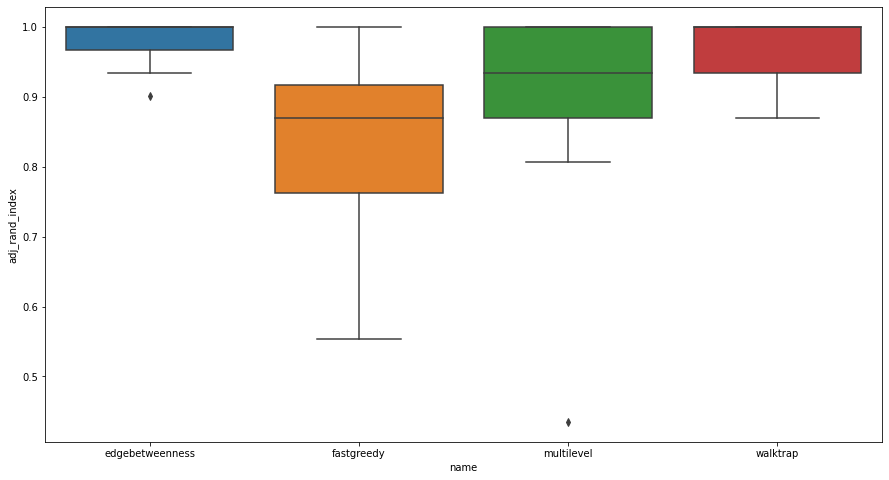

In [8]:
# Visualizing results
fig, ax = plt.subplots(figsize=(15,8))
ax, stats = draw_best_community_solutions(best_solutions,ax)
stats


## Fig. 6 results

In [9]:
# Define an experiment configuration instance (parameters for data generation)
# Fig. 6 (see paper)
expconfig = ExpConfig(
    L=[15,15], U=[15,15], NumEdges=100, BC=0.1, NumGraphs=1000,
    shuffle=True, seed=42
)
print(expconfig) # Print parameters, or access individually, e.g., expconfig.NumEdges

# Generate data following the defined experiment confguration
expgen = DataGenerator(expconfig=expconfig) # Pass defined parameters
print(expgen)
datagen = expgen.generate_data() # datagen is an iterator

<ExpConfig: filename=, L=[15, 15], U=[15, 15], NumNodes=60, NumEdges=100, BC=0.1, NumGraphs=1000, shuffle=True, seed=42>
<DataGenerator: ExpConfig: filename=, L=[15, 15], U=[15, 15], NumNodes=60, NumEdges=100, BC=0.1, NumGraphs=1000, shuffle=True, seed=42>


In [10]:
# Define the contestant approaches to run on the data
algos = [
    contestant.ComDetMultiLevel(), # Multi-Level approach
    contestant.ComDetEdgeBetweenness(), # EdgeBetweenness approach
    contestant.ComDetWalkTrap(), # WalkTrap approach
    contestant.ComDetFastGreedy(), # FastGreedy approach
]

# Now run each contestant algorithm on each graph in the data set
results = [] # Holds results of contestants
for g_idx, graph in enumerate(datagen):
    print(f'Processing Graph {g_idx+1}')
    for algo in algos:
        print(f'\tUsing algoithm {algo.name_}')
        result = algo.detect_communities(graph=graph).get_results()
        # Result is a list of dictionaries, each dictionary stores the metrics of one iteration (see code for details)
        for r in result: # Appending graph index to results, for debugging purposes
            r['graph_idx'] = g_idx + 1
        results.extend(result)

# Optional: Convert results into a dataframe (to use pandas capabilities)
df_contestants = pd.DataFrame(results) # Column names are inferred from the dictionaries' keys
print(df_contestants.shape)
df_contestants.head()

# Optional: saving results
import os
path = './_temp'
os.makedirs(path, exist_ok=True) # Create the path if it does not exist
df_contestants.to_csv(os.path.join(path, 'contestants.csv'), index=None)
# df_contestants.to_pickle('./_temp/contestants.pickle') # Binary format


Processing Graph 1
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 2
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 3
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 4
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 5
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 6
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 7
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 8
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoi

	Using algoithm fastgreedy
Processing Graph 64
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 65
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 66
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 67
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 68
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 69
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 70
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 71
	Using algoithm multilevel
	Using al

Processing Graph 127
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 128
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 129
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 130
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 131
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 132
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 133
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 134
	Using algoithm multilevel
	Using algoithm edgebetweenn

	Using algoithm fastgreedy
Processing Graph 190
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 191
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 192
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 193
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 194
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 195
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 196
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 197
	Using algoithm multilevel
	

	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 253
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 254
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 255
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 256
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 257
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 258
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 259
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 260
	Us

	Using algoithm fastgreedy
Processing Graph 315
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 316
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 317
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 318
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 319
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 320
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 321
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 322
	Using algoithm multilevel
	

Processing Graph 377
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 378
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 379
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 380
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 381
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 382
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 383
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 384
	Using algoithm multilevel
	Using algoithm edgebetweenn

	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 440
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 441
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 442
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 443
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 444
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 445
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 446
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 447
	Us

Processing Graph 502
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 503
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 504
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 505
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 506
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 507
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 508
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 509
	Using algoithm multilevel
	Using algoithm edgebetweenn

	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 565
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 566
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 567
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 568
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 569
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 570
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 571
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 572
	Us

	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 628
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 629
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 630
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 631
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 632
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 633
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 634
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 635
	Us

Processing Graph 690
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 691
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 692
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 693
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 694
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 695
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 696
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 697
	Using algoithm multilevel
	Using algoithm edgebetweenn

	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 753
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 754
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 755
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 756
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 757
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 758
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 759
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 760
	Us

	Using algoithm fastgreedy
Processing Graph 815
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 816
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 817
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 818
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 819
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 820
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 821
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 822
	Using algoithm multilevel
	

	Using algoithm fastgreedy
Processing Graph 878
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 879
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 880
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 881
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 882
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 883
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 884
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 885
	Using algoithm multilevel
	

Processing Graph 941
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 942
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 943
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 944
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 945
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 946
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 947
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 948
	Using algoithm multilevel
	Using algoithm edgebetweenn

,name,count,mean,std,min,25%,50%,75%,max
0,edgebetweenness,1000.0,0.699784,0.195005,0.160907,0.568480,0.729836,0.864453,1.0
1,fastgreedy,1000.0,0.559025,0.209825,0.095121,0.391287,0.567968,0.734325,1.0
2,multilevel,1000.0,0.589943,0.197422,0.038384,0.458411,0.601833,0.742767,1.0
3,walktrap,1000.0,0.619849,0.209236,0.067692,0.471119,0.634703,0.796930,1.0


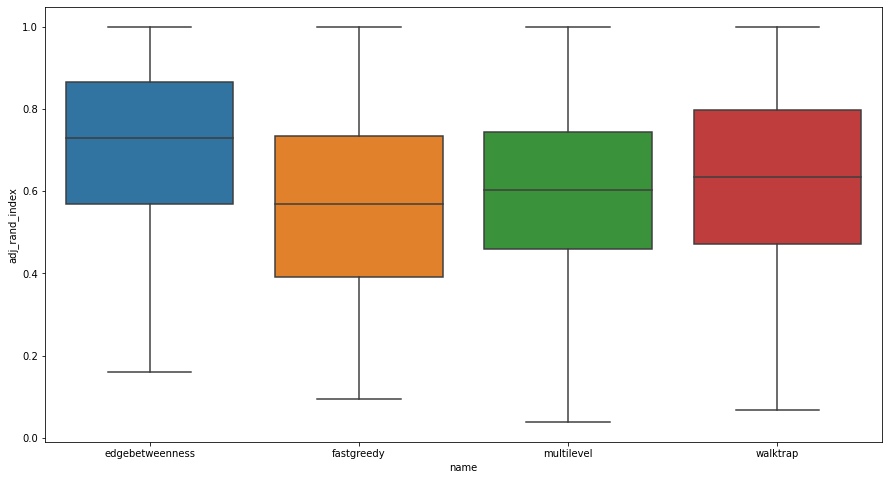

In [11]:
# Extracing results for contestants
best_solutions = get_best_community_solutions(df_contestants).reset_index(drop=True)
best_solutions

# Visualizing results
fig, ax = plt.subplots(figsize=(15,8))
ax, stats = draw_best_community_solutions(best_solutions,ax)
stats
